In [24]:
%run setup.py

<Figure size 600x400 with 0 Axes>

In [25]:
t, y =np.loadtxt('6063448.txt', usecols=(0,1)).T

sort = np.argsort(t)
t = t[sort]
y = y[sort]

time, flux = t, y

In [19]:
from maelstrom.utils import unique_colors
from maelstrom import Maelstrom

ms = Maelstrom(t,y,max_peaks=3, fmin=10)

In [20]:
mnras_size(540.)

[7.5, 4.635254915624212]

(0.00069067876897826, 0.04986700712023039)

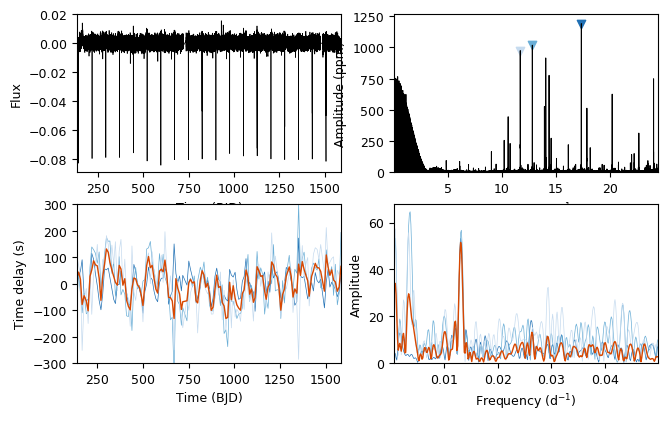

In [26]:
from maelstrom import Maelstrom
from maelstrom.utils import unique_colors


fig, axes = plt.subplots(2,2,figsize=[7.5, 4.63])
axes = axes.flatten()

ms = Maelstrom(t,y,max_peaks=3, fmin=10)
time_midpoints, time_delays = ms.get_time_delay(segment_size=10., return_phase_error=False)
time_midpoints += ms.time_mid

# Get weighted time delay
peak_amps = []
for f in ms.freq:
    # Get amplitude of the frequency
    model = LombScargle(time, flux)
    sc = model.power(f, method="fast", normalization="psd")
    fct = np.sqrt(4./len(time))
    peak_amps.append(np.sqrt(sc) * fct)
    
td_weighted = np.average(time_delays, axis=0, weights=peak_amps)
colors = unique_colors(len(time_delays), cmap='Blues')[::-1]

ax = axes[0]
ax.plot(t, y, "k", linewidth=0.5)
ax.set_xlabel('Time (BJD)')
ax.set_ylabel("Flux")
ax.set_xlim([t.min(), t.max()])

ax = axes[2]
for i, color in zip(time_delays, colors):
    ax.plot(time_midpoints, i, linewidth=0.5, c=color)
#ax.set_ylim(-np.max(time_delays[0]+200), np.max(time_delays[0])+200)
ax.set_xlim(time_midpoints[0], time_midpoints[-1])
ax.set_xlabel('Time (BJD)')
ax.set_ylabel('Time delay (s)')
ax.plot(time_midpoints, td_weighted, c=[0.84627451, 0.28069204, 0.00410611], linewidth=1.)
ax.set_ylim(-300,300)

ax = axes[1]
f, a = amp_spectrum(time, flux)
ax.plot(f,a*1e6, linewidth=0.7, c='black')
for freq, amp, color in zip(ms.freq, peak_amps, colors):
    ax.scatter(freq, amp*1e6, marker='v', color=color)
ax.set_xlim(f[0], f[-1])
ax.set_ylim(0, None)
ax.set_ylabel('Amplitude (ppm)')
ax.set_xlabel(r'Frequency (d$^{-1}$)')

ax = axes[3]
for td, color in zip(time_delays, colors):
    f, a = amp_spectrum(time_midpoints, td)
    ax.plot(f, a, c=color, alpha=1, linewidth=0.5)
f, a = amp_spectrum(time_midpoints, td_weighted)
ax.plot(f, a, c=[0.84627451, 0.28069204, 0.00410611], linewidth=1.)
#ax.annotate(str(np.round(1/f[np.argmax(a)], 3)), (0.9, 0.9), xycoords='axes fraction')
ax.set_xlabel(r'Frequency (d$^{-1}$)')
ax.set_ylabel('Amplitude')
ax.set_ylim(0,None)
ax.set_xlim(f[0],f[-1])

#plt.subplots_adjust(hspace=0.3)

#plt.savefig(overleaf_path + 'eb.pdf', dpi=300, bbox_inches='tight', pad_inches=0)